In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
class Runner(object):
    def __init__(self, background_rate):
        self.background_rate = background_rate

    def run_many_trials(self, batch_size, num_samples=10_000):
        results = []
        for i in range(num_samples):
            results.append(self.run_trial(batch_size))
        avg_tests = np.mean(results)
        tests_per_person = avg_tests / batch_size
        return tests_per_person
        
        
    def create_infections(self, batch_size):
        v = np.random.random(size=batch_size)
        v = v < self.background_rate
        return v
    
    def run_trial(self, batch_size):
        people = self.create_infections(batch_size)
        if sum(people) == 0:
            return 1
        return 1 + batch_size
    
    def run(self):
        results = []
        for batch_size in range(1,12):
            results.append(self.run_many_trials(batch_size))
        return min(results)

In [75]:
background_rates = np.linspace(0.001, 1.0, 10)
efficiencies = []
for rate in background_rates.tolist():
    runner = Runner(rate)
    efficiencies.append(runner.run())

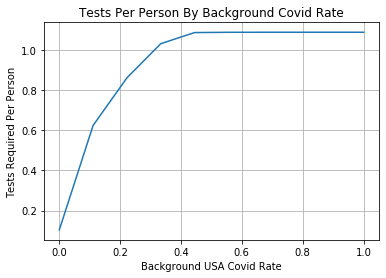

In [76]:
plt.grid()
plt.title("Tests Per Person By Background Covid Rate")
plt.xlabel("Background USA Covid Rate")
plt.ylabel("Tests Required Per Person")
plt.plot(background_rates, efficiencies)
plt.savefig("tests_per_person_by_covid_rate.png")

In [ ]:
americans = 300_000_000

In [ ]:
plt.plot(range(3,20), results)
plt.title("Required Tests Per Person By Batch Size\n1% in USA has Covid Today")
plt.grid()
plt.xlabel('Batch Size')
plt.ylabel('Tests Per Person')
plt.savefig('required_tests_per_person')

In [37]:
table = list(zip(range(3,20), results))

In [40]:
min(results) * americans

100154000.0

In [38]:
import pandas as pd
df = pd.DataFrame(table)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])